# Perceptron Adaline

## Opérateur logique ET


In [14]:
from perceptron import PerceptronAdaline
from perceptron.testfile import perceptron_adaline
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

perceptron = PerceptronAdaline(input_size=2, learning_rate=0.03, epochs=10000)
perceptron.weights = [0.0,0.0,0.0]

df = load_dataframe_from_file("../datasets/table_2_3.csv")
print(df)

history = perceptron.train_classification(df, seuil=0.1251)

      inputs  label
0  [1, 0, 0]     -1
1  [1, 0, 1]     -1
2  [1, 1, 0]     -1
3  [1, 1, 1]      1
Training complete after 202 epochs with MSE=0.12509907853605345 & weights=[-1.48783434  1.00862694  0.99287716] & prediction=[-1.48729559 -0.48023962 -0.48007779  0.46557117]


Une fois que l'entrainement est terminé, on constate que les prédictions du neurone sont bonnes :

In [15]:
for _, row in df.iterrows():
    print(f"Cas {row["inputs"][1:]} : {perceptron.round_predict(row["inputs"])}")

Cas [0 0] : -1
Cas [0 1] : -1
Cas [1 0] : -1
Cas [1 1] : 1


Voici maintenant deux graphiques reprenant respectivement l'évolution de la précision, l'évolution de l'erreur moyenne quadratique du perceptron et l'évolution des poids de celui-ci

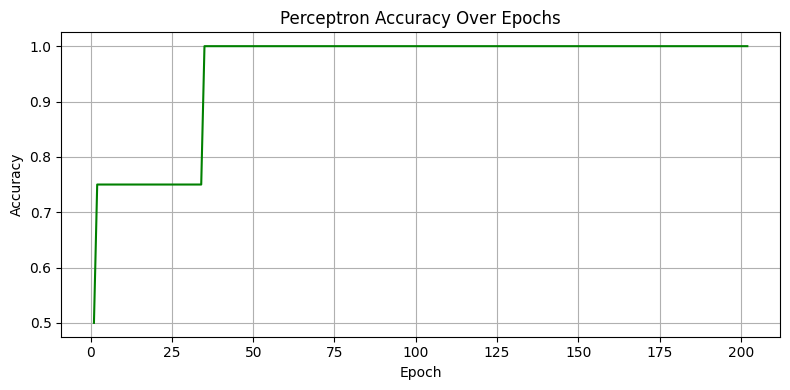

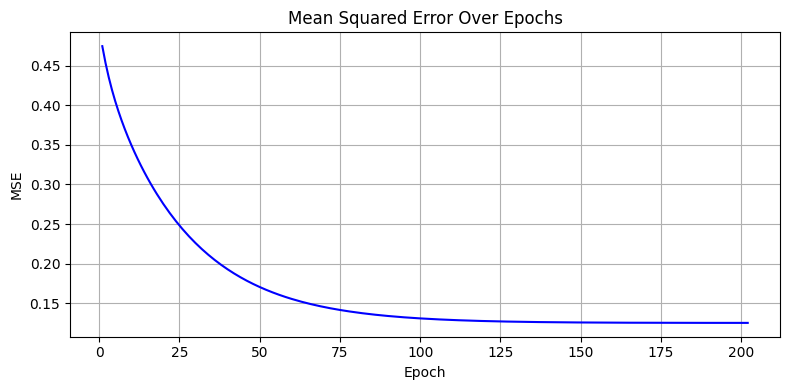

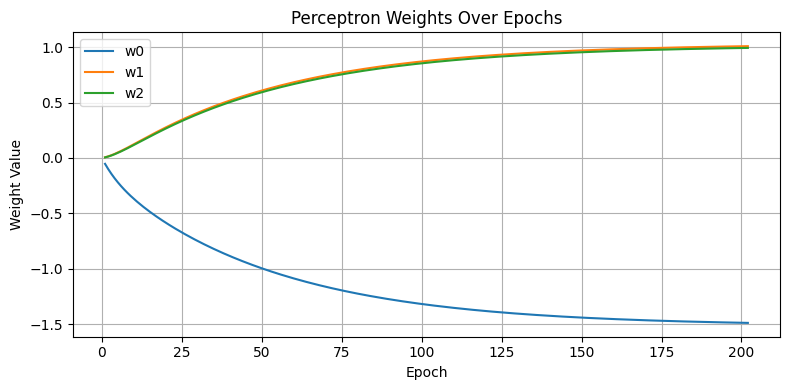

In [16]:
training = history.df

# Évolution de l'entrainement
plt.figure(figsize=(8, 4))
plt.plot(training['epoch'], training['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Perceptron Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(training['epoch'], training['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

weights_df = pd.DataFrame(training["weights"].to_list(), columns=[f"w{i}" for i in range(len(training['weights'].iloc[0]))])
weights_df["epoch"] = training["epoch"]
plt.figure(figsize=(8, 4))
for col in weights_df.columns:
    if col != "epoch":
        plt.plot(weights_df["epoch"], weights_df[col], label=col)



plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title("Perceptron Weights Over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Il est clair ici que la précision augmente avec les itérations et atteint rapidement les 100%

Voici maintenant un graphique de la droite de décision

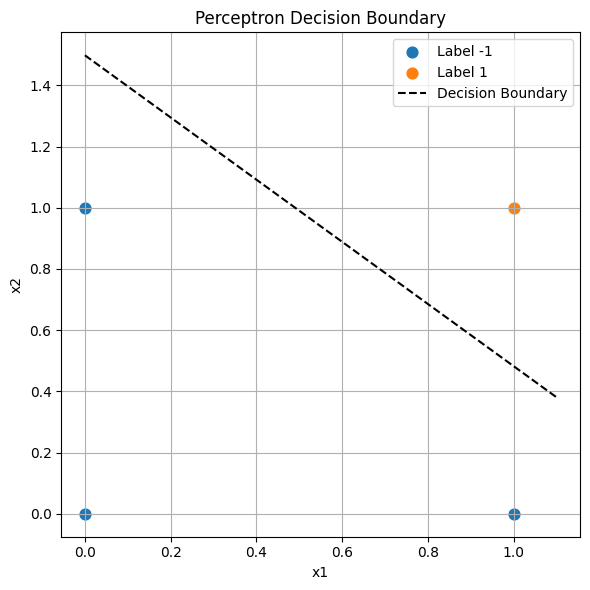

In [17]:
final_weights = perceptron.weights
bias = final_weights[0]
w1 = final_weights[1]
w2 = final_weights[2]
X = np.array([inp[1:] for inp in df["inputs"]])
y = df["label"].values
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    points = X[y == label]
    plt.scatter(points[:, 0], points[:, 1], label=f"Label {label}", s=60)

# y = -(bias + w1*x) / w2
x_vals = np.linspace(0, 1.1, 100)
if w2 != 0:
    y_vals = -(bias + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
else:
    x_intercept = -bias / w1 if w1 != 0 else 0
    plt.axvline(x=x_intercept, color='k', linestyle='--', label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

La droite de décision sépare bien les points de façon assez large, à mi-distance entre les points, ce qui démontre que le perceptron Adaline se généralise plutôt bien

## Classification de données linéaires séparables (table 2.9)

In [18]:
exemple2 = PerceptronAdaline(input_size=2, learning_rate=0.012, epochs=1000)
df = load_dataframe_from_file("../datasets/table_2_9.csv")
print(df)
exemple2.weights = np.array([0.0,0.0,0.0])
history = exemple2.train_classification(df, seuil=0, until_no_error=True)

        inputs  label
0    [1, 1, 6]      1
1    [1, 7, 9]     -1
2    [1, 1, 9]      1
3   [1, 7, 10]     -1
4    [1, 2, 5]     -1
5    [1, 2, 7]      1
6    [1, 2, 8]      1
7    [1, 6, 8]     -1
8    [1, 6, 9]     -1
9    [1, 3, 5]     -1
10   [1, 3, 6]     -1
11   [1, 3, 8]      1
12   [1, 3, 9]      1
13   [1, 5, 7]     -1
14   [1, 5, 8]     -1
15  [1, 5, 10]      1
16  [1, 5, 11]      1
17   [1, 4, 6]     -1
18   [1, 4, 7]     -1
19   [1, 4, 9]      1
20  [1, 4, 10]      1


TypeError: PerceptronAdaline.train_classification() got an unexpected keyword argument 'until_no_error'